# Comparing MOM6 data to hydrographic section

In this notebook, we show how to compare model's results with observations using xESMF.

In [1]:
import xarray as xr
import xesmf
import zipfile
import pandas

In [2]:
import warnings
warnings.filterwarnings("ignore")

In [3]:
%matplotlib inline

First we load the sample model data:

In [4]:
dataurl = 'http://35.188.34.63:8080/thredds/dodsC/OM4p5/'

ds = xr.open_dataset(f'{dataurl}/ocean_monthly_z.200301-200712.nc4',
                     chunks={'time':1, 'z_l': 1}, engine='pydap')

Then we download data from Calcofi:

In [5]:
!curl -O https://cappuccino.ucsd.edu/downloads/2012/20-1202NH_CTDFinalQC.zip

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 36.9M  100 36.9M    0     0  3933k      0  0:00:09  0:00:09 --:--:-- 5815k  0:00:03  0:00:19 1672k07  0:00:05 4261k


We need to play a bit with the zip file to read the data into a pandas dataframe:

In [6]:
with zipfile.ZipFile('20-1202NH_CTDFinalQC.zip', 'r') as archive:
    data = archive.extract('db_csvs/20-1202NH_CTDBTL_001-075D.csv')
    df = pandas.read_csv('db_csvs/20-1202NH_CTDBTL_001-075D.csv')

In [7]:
df

,Project,Study,Ord_Occ,Event_Num,Cast_ID,Date_Time_UTC,Date_Time_PST,Lat_Dec,Lon_Dec,Sta_ID,...,SaltB,OxB,OxBuM,Chl-a,Phaeo,NO3,NO2,NH4,PO4,SIL
0,CalCOFI,1202NH,1,7.0,1202_001d,27-Jan-2012 23:57:08,27-Jan-2012 15:57:08,32.95690,-117.30751,093.3 026.7,...,33.3669,6.546,285.89,1.826,0.239,0.0,0.00,0.00,0.24,0.5
1,CalCOFI,1202NH,1,7.0,1202_001d,27-Jan-2012 23:57:43,27-Jan-2012 15:57:43,32.95685,-117.30740,093.3 026.7,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,CalCOFI,1202NH,1,7.0,1202_001d,27-Jan-2012 23:57:44,27-Jan-2012 15:57:44,32.95684,-117.30740,093.3 026.7,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,CalCOFI,1202NH,1,7.0,1202_001d,27-Jan-2012 23:57:45,27-Jan-2012 15:57:45,32.95684,-117.30740,093.3 026.7,...,33.3678,6.589,287.79,1.581,0.300,0.0,0.00,0.00,0.24,0.5
4,CalCOFI,1202NH,1,7.0,1202_001d,27-Jan-2012 23:57:46,27-Jan-2012 15:57:46,32.95684,-117.30738,093.3 026.7,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
33408,CalCOFI,1202NH,75,882.0,1202_075d,12-Feb-2012 03:57:53,11-Feb-2012 19:57:53,35.08678,-120.77914,076.7 049.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
33409,CalCOFI,1202NH,75,882.0,1202_075d,12-Feb-2012 03:58:00,11-Feb-2012 19:58:00,35.08677,-120.77916,076.7 049.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
33410,CalCOFI,1202NH,75,882.0,1202_075d,12-Feb-2012 03:58:07,11-Feb-2012 19:58:07,35.08676,-120.77920,076.7 049.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
33411,CalCOFI,1202NH,75,882.0,1202_075d,12-Feb-2012 03:58:23,11-Feb-2012 19:58:23,35.08674,-120.77926,076.7 049.0,...,33.6131,3.468,151.27,0.405,1.092,18.2,0.28,0.52,1.64,21.7


Let's define a function to plot the longitude/latitude of the stations:

In [8]:
import matplotlib.pyplot as plt
import matplotlib.ticker as mticker
from cartopy.mpl.gridliner import LONGITUDE_FORMATTER, LATITUDE_FORMATTER
import cartopy.feature as cfeature
import cartopy.crs as ccrs

def plot_stations(lon, lat):
    fig = plt.figure(figsize=[16,10])
    ax = plt.axes(projection=ccrs.PlateCarree())
    ax.add_feature(cfeature.COASTLINE)
    ax.add_feature(cfeature.LAND)
    ax.set_extent([-126, -115, 29, 36])

    # parallels/meridiens
    gl = ax.gridlines(crs=ccrs.PlateCarree(), draw_labels=True,
                      linewidth=2, color='gray', alpha=0.5, linestyle='--')
    gl.xlabels_top = False
    gl.ylabels_right = False
    gl.xlabel_style = {'size': 18, 'color': 'black'}
    gl.ylabel_style = {'size': 18, 'color': 'black'}

    plt.plot(lon, lat, 'ko')
    return fig

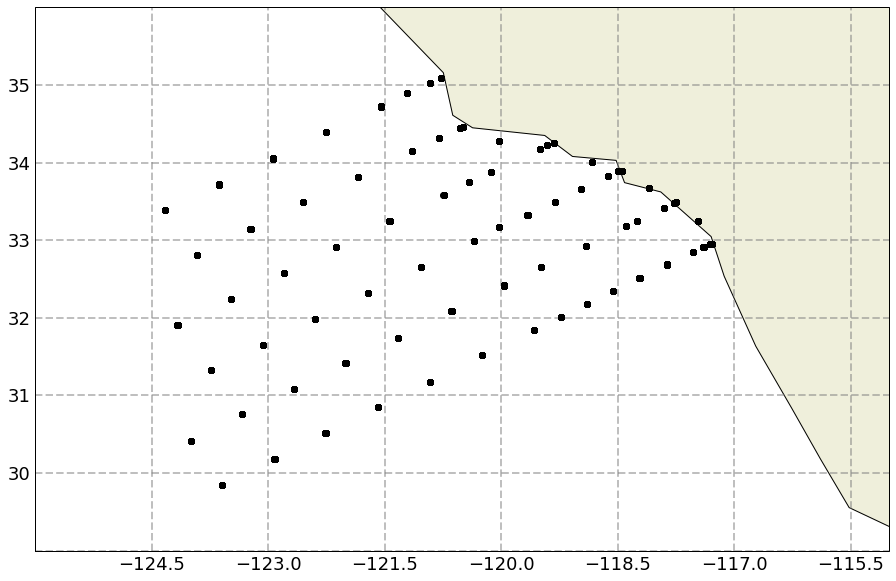

In [9]:
fig = plot_stations(df['Lon_Dec'], df['Lat_Dec'])

Calcofi is an array with multiple Lines, we can extract lon/lat on a single line using the surface values:

In [10]:
df_linesurf = df[['Lon_Dec', 'Lat_Dec']].where(df['Line'] == 93.3).where(df['Depth'] <= 2.0).drop_duplicates().dropna()

In [11]:
df_linesurf

,Lon_Dec,Lat_Dec
0,-117.30751,32.95690
59,-117.28240,32.95315
60,-117.28262,32.95292
89,-117.39411,32.91489
608,-117.53097,32.84862
1123,-117.86989,32.68423
1639,-118.21614,32.51461
2156,-118.55562,32.34692
2672,-118.89647,32.18020
3190,-119.23289,32.01236


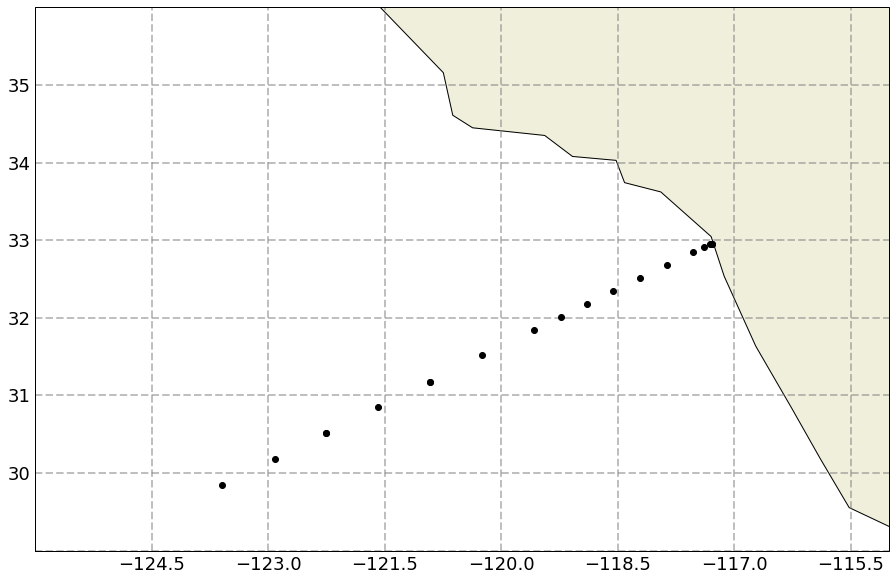

In [12]:
fig = plot_stations(df_linesurf['Lon_Dec'], df_linesurf['Lat_Dec'])

We can now use these locations to create a xesmf Regrid object and interpolate the model's data onto these stations. This uses the LocStream capabilities of ESMF. More details can be found in the [xESMF documentation on LocStream](https://xesmf.readthedocs.io/en/latest/notebooks/Using_LocStream.html). The first part is to create a xarray dataset with the stations:

In [13]:
ds_locs = xr.Dataset()
ds_locs['lon'] = xr.DataArray(data=df_linesurf['Lon_Dec'], dims=('stations'))
ds_locs['lat'] = xr.DataArray(data=df_linesurf['Lat_Dec'], dims=('stations'))

In [14]:
ds_locs

<xarray.Dataset>
Dimensions:   (stations: 19)
Coordinates:
  * stations  (stations) int64 0 59 60 89 608 1123 ... 5253 5770 5771 6286 6801
Data variables:
    lon       (stations) float64 -117.3 -117.3 -117.3 ... -122.3 -122.9 -123.6
    lat       (stations) float64 32.96 32.95 32.95 32.91 ... 30.51 30.18 29.85

We can now create the regridding weights and apply to a variable (for example salinity):

In [15]:
regridder = xesmf.Regridder(ds.rename({'geolon': 'lon', 'geolat': 'lat'}), ds_locs, 'bilinear', locstream_out=True)

Create weight file: bilinear_576x720_1x19.nc


In [16]:
salt_calcofi_line = regridder(ds['so'])

Let's use the first time record to make a test plot and compare to observations:

In [17]:
salt_0 = salt_calcofi_line.sel(time='2003-01-16')
_ = salt_0.load()

We extract and plot the data on the Calcofi Line:

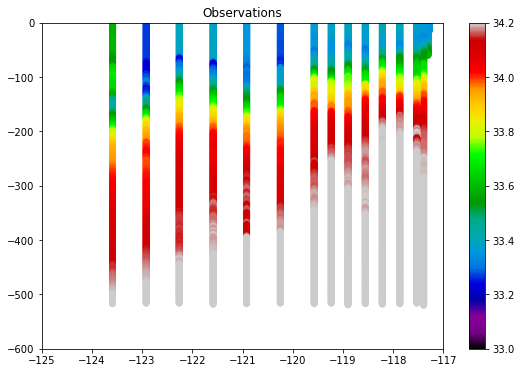

In [18]:
df_line = df.where(df['Line'] == 93.3)

plt.figure(figsize=[9, 6])
plt.scatter(df_line['Lon_Dec'], - df_line['Depth'], c=df_line['Salt1'],
            vmin=33, vmax=34.2, cmap='nipy_spectral')
plt.colorbar()
_ = plt.axis([-125, -117, -600, 0])
_ = plt.title('Observations')

And now the data interpolated from the model:

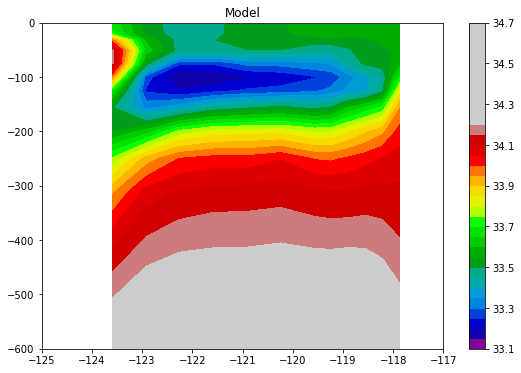

In [19]:
plt.figure(figsize=[9, 6])
plt.contourf(salt_0['lon'], - salt_0['z_l'], salt_0.values.squeeze(), 30,
            vmin=33, vmax=34.2, cmap='nipy_spectral')
plt.colorbar()
_ = plt.axis([-125, -117, -600, 0])
_ = plt.title('Model')

and that's it!